In [5]:
!which python

/Users/pataoengineer/code/52-challenges/024-table-reconstruction-from-image/notebooks/env/bin/python


In [3]:
!pip install numpy pandas opencv-python

You should consider upgrading via the '/Users/pataoengineer/code/52-challenges/024-table-reconstruction-from-image/notebooks/env/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip list

Package         Version
--------------- --------
numpy           1.19.5
opencv-python   4.5.1.48
pandas          1.2.1
pip             20.3.3
python-dateutil 2.8.1
pytz            2020.5
setuptools      51.0.0
six             1.15.0
wheel           0.36.2
You should consider upgrading via the '/Users/pataoengineer/code/52-challenges/024-table-reconstruction-from-image/notebooks/env/bin/python -m pip install --upgrade pip' command.


In [2]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
im_orig = cv2.imread('../data/DhYCcE3V4AEmnG3.jpg')

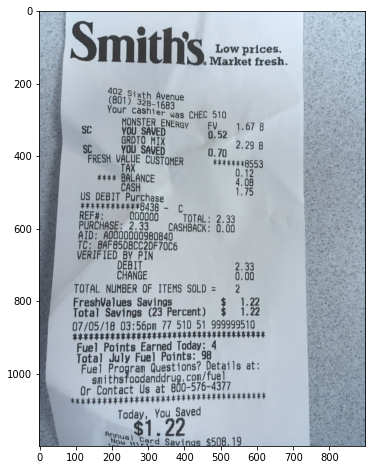

In [4]:
plt.imshow(im_orig)

In [5]:
im_orig.shape

(1200, 900, 3)

In [6]:
im_orig[600, 600]

array([177, 186, 190], dtype=uint8)

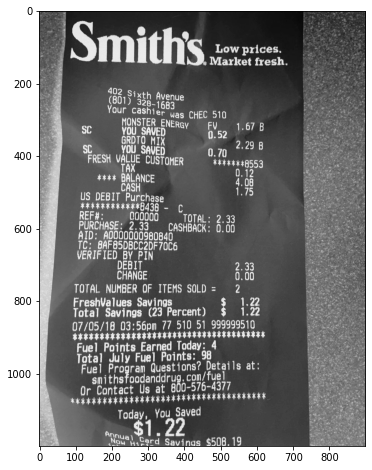

In [7]:
im = cv2.cvtColor(im_orig, cv2.COLOR_BGR2GRAY)
plt.imshow(im, 'Greys')

(array([7.0000e+00, 1.6000e+01, 3.6000e+01, 7.4000e+01, 2.2900e+02,
        2.6900e+02, 5.1400e+02, 7.5500e+02, 1.7520e+03, 1.5880e+03,
        2.0520e+03, 2.4990e+03, 4.8660e+03, 3.9650e+03, 4.8180e+03,
        6.6050e+03, 1.0918e+04, 6.3370e+03, 5.1680e+03, 4.2470e+03,
        5.0640e+03, 2.8940e+03, 2.5660e+03, 2.4750e+03, 3.5010e+03,
        2.3970e+03, 2.5230e+03, 2.8890e+03, 4.9180e+03, 3.5390e+03,
        3.5250e+03, 3.4060e+03, 4.6940e+03, 2.7140e+03, 2.4630e+03,
        2.4470e+03, 3.4720e+03, 2.3120e+03, 2.3380e+03, 2.2480e+03,
        3.3310e+03, 2.3610e+03, 2.3970e+03, 2.5680e+03, 3.9800e+03,
        2.8270e+03, 2.9700e+03, 3.0790e+03, 5.0450e+03, 3.6010e+03,
        3.9180e+03, 4.2770e+03, 6.9920e+03, 5.3690e+03, 5.8860e+03,
        6.5550e+03, 1.1129e+04, 8.7690e+03, 9.8890e+03, 1.1552e+04,
        1.9344e+04, 1.3539e+04, 1.3916e+04, 1.4214e+04, 2.1559e+04,
        1.4937e+04, 1.5237e+04, 1.4155e+04, 2.0884e+04, 1.4700e+04,
        1.5987e+04, 1.9944e+04, 3.8496e+04, 3.24

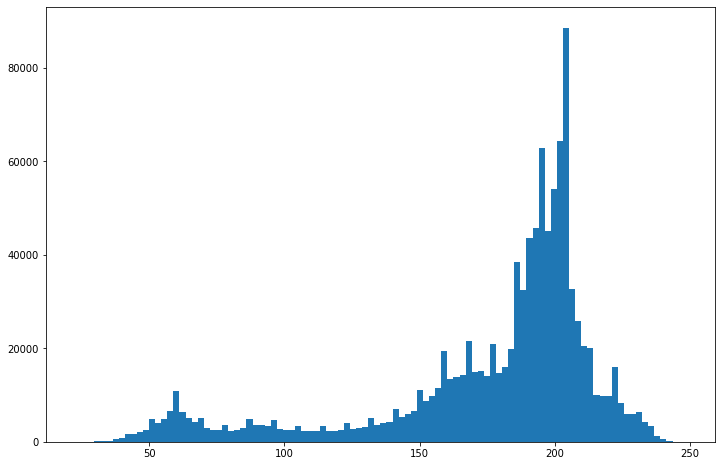

In [8]:
plt.hist(im.flatten(), bins=100, histtype='bar')

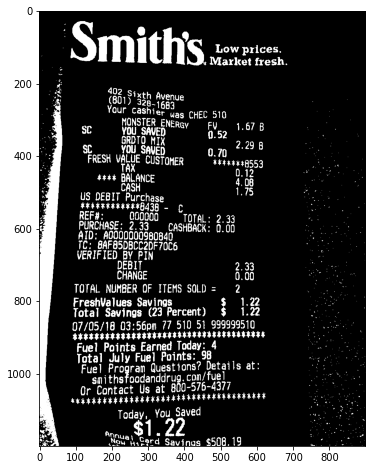

In [9]:
im[im<120] = 0
im[im>0] = 255
plt.imshow(im, 'Greys')

(array([127189.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

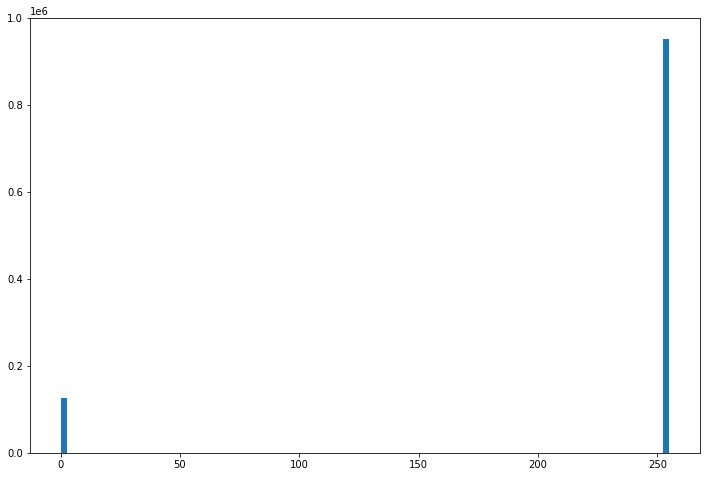

In [10]:
plt.hist(im.flatten(), bins=100, histtype='bar')

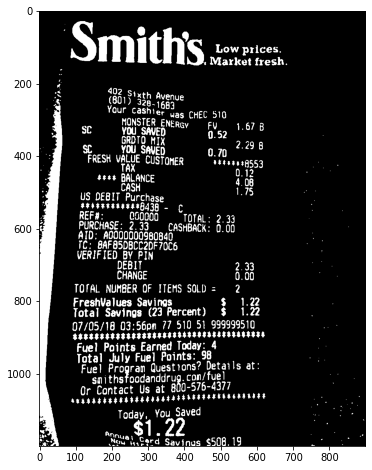

In [23]:
im2 = cv2.medianBlur(im, 3)
plt.imshow(im2, 'Greys')

In [26]:
im3 = 255 - im2
mask = np.zeros_like(im3)

n_labels, blobs, stats, centroids = cv2.connectedComponentsWithStats(im3, 4, cv2.CV_32S)
for lbl in range(n_labels):
    l = stats[lbl, cv2.CC_STAT_LEFT]
    t = stats[lbl, cv2.CC_STAT_TOP]
    w = stats[lbl, cv2.CC_STAT_WIDTH]
    h = stats[lbl, cv2.CC_STAT_HEIGHT]
    a = stats[lbl, cv2.CC_STAT_AREA]
    if a>10 and a<256:
        mask[blobs == lbl] = 255

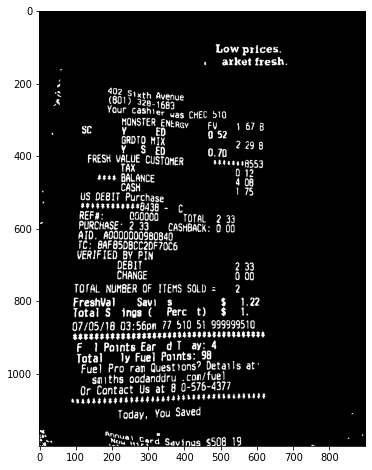

In [28]:
plt.imshow(255-mask, 'Greys')